# Script to generate urban layouts from the citygenerator package
Generates urban layouts based on input parameters:
1. building density $\lambda_p$
2. frontal aspect ratio $\lambda_f$.

An optional greenery density $\lambda_g$ can be defined.

Randomness is generated by 
3. chossing a fractal type for the street layout: "hierarchical", "cascade" or "random".
4. choosing a degree of randomness for street intersections and street widths.
5. choosing a degree of randomness for block heights.

# Contents
[Setup](#Setup)

[Generate layout](#Generate-layout)

[Video of generation process](#Video-of-generation-process)

[Write data](#Write-data)

[Run checks](#Run-checks-for-generated-layout)

---
## Setup

#### Set up libaries and paths

In [1]:
%matplotlib inline
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
PROJ_DIR = Path(os.path.abspath('')).resolve().parent
sys.path.append(str(PROJ_DIR))
import citygenerator as cgen

#### Set up domain and resolution

In [2]:
imax = 200  # cells in x
jtot = 200  # cells in y
kmax = 200  # cells in z
xsize = 200  # domain size in x (in m)
ysize = 200  # domain size in y (in m)
zsize = 200  # domain size in z (in m)

---
## Generate layout
[Back to contents](#Contents)

### _Set layout parameters here_

In [3]:
lp = 0.4  # Building density (0 to 1)
lf = 0.2  # Frontal area aspect ratio (0 to 1)
lg = 0.1  # Greenery density (0 to 1)
o = 'r'  # "r for 'random', h for 'hierarchical' and c for 'cascade'
lrandom = 0.6  # degree of randomness for layout (0 to 1)
hrandom = 0.4  # degree of randomness for height (0 to 1)

#### Generate fractal blocks

In [4]:
savesteps=True  # whether to save step by step creation
blocks, greenery, blockgeneration = cgen.generate_layout(xsize, ysize, zsize, imax, jtot, kmax,
                                                         lp, lg, lf, order=o,
                                                         layoutrandom=lrandom, heightrandom=hrandom, 
                                                         margin=5, minwidth=8, minvolume=10,
                                                         savesteps=savesteps)
blockstats = cgen.utils.calculate_blockstats(blocks, a0=xsize*ysize)
print("lamda_p = ", blockstats['planindex'])
print("lambda_f = ", blockstats['frontindex'])

One block transformed to green space
lamda_p =  0.4366
lambda_f =  0.2077


#### Display block layout

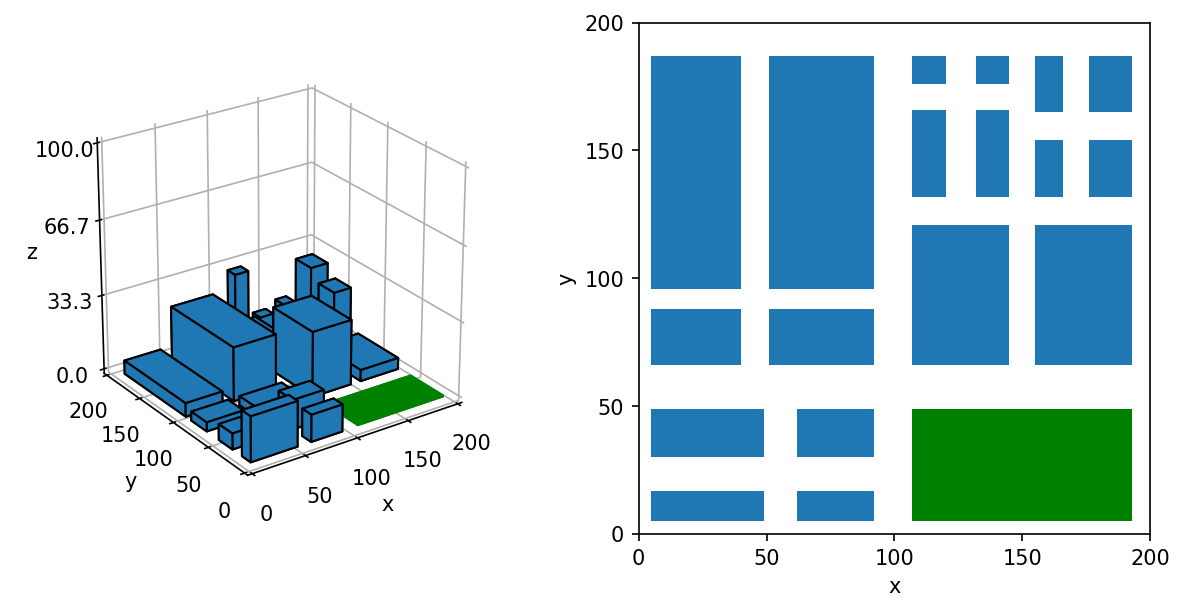

In [5]:
limits=[0, xsize, 0, ysize, 0, zsize/2]
fig = plt.figure(figsize=(8, 4.5), dpi=150)
# geometry plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
cgen.plot_3dlayout(blocks, ax=ax1, limits=limits, edgecolor='k')
cgen.plot_3dlayout(greenery, ax=ax1, limits=limits, facecolor='g')
ax1.dist=11
# layout plot
ax2 = fig.add_subplot(1, 2, 2)
cgen.plot_2dlayout(blocks, ax=ax2, limits=limits[:4])
cgen.plot_2dlayout(greenery, ax=ax2, limits=limits[:4], facecolor='g')
plt.tight_layout()
plt.show()

#### Block statistics

In [6]:
blockstats = cgen.utils.calculate_blockstats(blocks, a0=xsize*ysize)
print("lamda_p = ", blockstats['planindex'])
print("lambda_f = ", blockstats['frontindex'])
print("zmax = ", blockstats['heightmax'])
print("zh = ", blockstats['heightmean'])
print("no. of blocks: ", blockstats['nblocks'])
print("blocks:\n", blocks)

lamda_p =  0.4366
lambda_f =  0.2077
zmax =  33.0
zh =  14.5
no. of blocks:  18
blocks:
 [[5, 49.0, 5, 17.0, 0, 20.0], [62.0, 92.0, 5, 17.0, 0, 12.0], [62.0, 92.0, 30.0, 49.0, 0, 13.0], [5, 49.0, 30.0, 49.0, 0, 7.0], [107.0, 145.0, 66.0, 121.0, 0, 29.0], [155.0, 193.0, 66.0, 121.0, 0, 5.0], [107.0, 120.0, 132.0, 166.0, 0, 14.0], [132.0, 145.0, 132.0, 166.0, 0, 5.0], [132.0, 145.0, 176.0, 187.0, 0, 10.0], [107.0, 120.0, 176.0, 187.0, 0, 33.0], [155.0, 166.0, 132.0, 154.0, 0, 9.0], [176.0, 193.0, 132.0, 154.0, 0, 24.0], [176.0, 193.0, 165.0, 187.0, 0, 29.0], [155.0, 166.0, 165.0, 187.0, 0, 13.0], [5, 40.0, 66.0, 88.0, 0, 4.0], [51.0, 92.0, 66.0, 88.0, 0, 4.0], [51.0, 92.0, 96.0, 187.0, 0, 24.0], [5, 40.0, 96.0, 187.0, 0, 6.0]]


---
## Video of generation process
[Back to contents](#Contents)

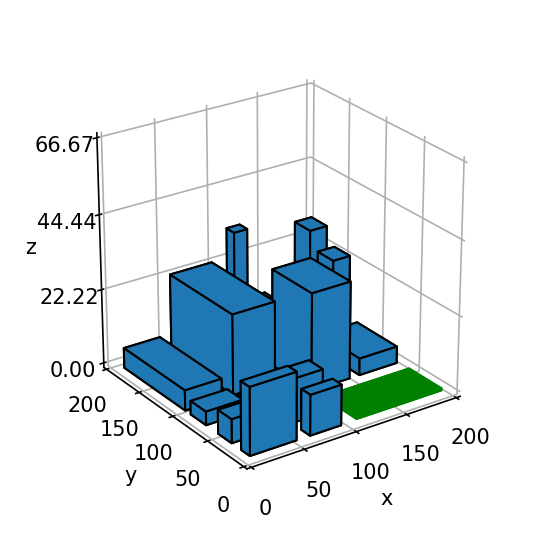

In [7]:
import citygenerator.video as cgenv  # requires IPython
save=True
path="./videos/"
show=FTrue
limits=[0, xsize, 0, ysize, 0, zsize/3]
fig = plt.figure(figsize=(8, 4.5), dpi=150)
cgenv.video_layout(blockgeneration, greenery, fig=fig, limits=limits, edgecolor='k', 
                  save=save, path=path, show=show)

---
## Write data
[Back to contents](#Contents)

#### Change resolution or convert blocks to grid indices

In [8]:
dx = imax/xsize
dy = jtot/ysize
dz = kmax/zsize
block_indices = cgen.utils.convert(blocks, dx, dy, dz, rounding=True)
print(block_indices)

[[5, 49, 5, 17, 0, 20], [62, 92, 5, 17, 0, 12], [62, 92, 30, 49, 0, 13], [5, 49, 30, 49, 0, 7], [107, 145, 66, 121, 0, 29], [155, 193, 66, 121, 0, 5], [107, 120, 132, 166, 0, 14], [132, 145, 132, 166, 0, 5], [132, 145, 176, 187, 0, 10], [107, 120, 176, 187, 0, 33], [155, 166, 132, 154, 0, 9], [176, 193, 132, 154, 0, 24], [176, 193, 165, 187, 0, 29], [155, 166, 165, 187, 0, 13], [5, 40, 66, 88, 0, 4], [51, 92, 66, 88, 0, 4], [51, 92, 96, 187, 0, 24], [5, 40, 96, 187, 0, 6]]


#### Write the data

In [9]:
savedir = "./layouts"
if not os.path.exists(savedir):
    os.mkdir(savedir)
blocksfile = os.path.join(savedir, 'blocks.txt')
cgen.utils.write(block_indices, blocksfile)

---
## Run checks for generated layout
[Back to contents](#Contents)

In [10]:
domain=[0, xsize, 0, ysize, 0, zsize]
dx = xsize/imax
dy = ysize/jtot
dz = zsize/kmax
resolution = [dx, dy, dz]
problemblocks = cgen.run_checks(blocks, domain, resolution, heightratio=6, blockvolume=10)
if problemblocks:  # if list is not empty
    fig = plt.figure(figsize=(8, 4.5), dpi=150)
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    cgen.plot_3dlayout(problemblocks, ax=ax1, edgecolor='k', 
                       limits=domain)
    ax2 = fig.add_subplot(1, 2, 2)
    cgen.plot_2dlayout(problemblocks, ax=ax2, limits=domain[:4])
    plt.suptitle("Problematic blocks")    
    plt.tight_layout()
    plt.show()

Checks completed.


[Back to contents](#Contents)